/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


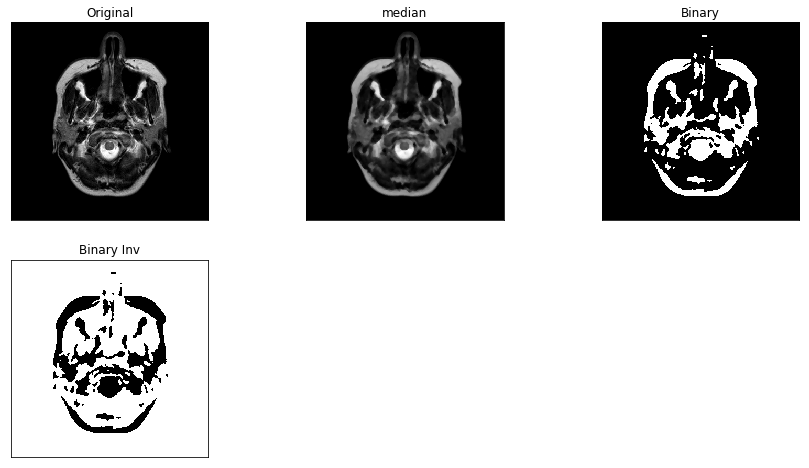

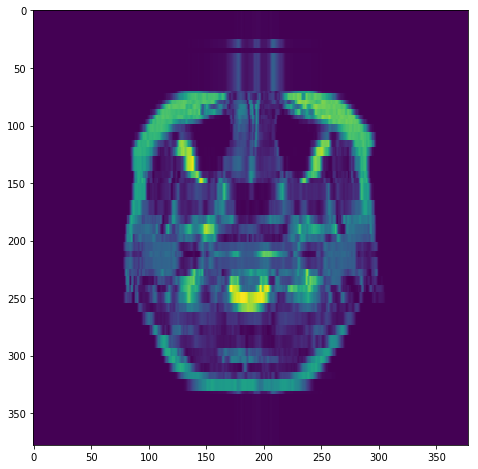

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import cv2
import matplotlib.pyplot as plt

image = ndimage.imread("i002.bmp", 0)
plt.figure(figsize = (15,8))
plt.imshow(image)


imgpath1 =  "i002.bmp"
#grayscaling the image
img = cv2.imread(imgpath1, 0)
#denoising the image
median = cv2.medianBlur(img, 5)
    
th = 0
max_val = 255
    
#thresholding the image-Otsu's thresholding
ret, o1 = cv2.threshold(median, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(median, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
    
output = [img, median, o1, o2]
  
titles = ['Original', 'median', 'Binary', 'Binary Inv']
    
for i in range(4):
    plt.subplot(2, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show() 

#clustering the image
kmeans_cluster = cluster.KMeans(n_clusters=35)
kmeans_cluster.fit(image)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels])